**About this file**

The Video_Games.csv file provides comprehensive data on video game sales, ratings, and user insights globally, including details such as the game's name, platform, year of release, genre, publisher, sales in different regions, critic and user scores, and ESRB rating

Name: The name of the video game. (String)

Platform: The platform on which the game is available, such as PC, PS4, Xbox, etc. (String)

Year_of_Release: The year in which the game was released. (Integer)

Genre: The genre of the game, such as Action, Sports, etc. (String)

Publisher: The company that published the game. (String)

NA_Sales: The sales of the game in North America, in millions. (Float)

EU_Sales: The sales of the game in Europe, in millions. (Float)

JP_Sales: The sales of the game in Japan, in millions. (Float)

Other_Sales: The sales of the game in other regions, in millions. (Float)

Global_Sales: The total global sales of the game, in millions. (Float)

Critic_Score: The average score given to the game by critics. (Float)

Critic_Count: The number of critics who reviewed the game. (Integer)

User_Score: The average score given to the game by users. (Float)

User_Count: The number of users who reviewed the game. (Integer)

Developer: The company that developed the game. (String)

Rating: The ESRB rating of the game, such as E for Everyone, T for Teen, or M for Mature. (String)

In [2]:
import pandas as pd
import numpy as np

In [3]:
#creating a df using pandas and the dataset csv file
df =pd.read_csv(r'/home/amt/Downloads/Datasets/Video_Games.csv')

In [4]:
#trying to see the overview of the data, seeing the number of columns
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#year_of_release and User_Count has NaN so leaving it to be float dtype instead of int remains the best option

In [6]:
#working on Rating column, seeing what values it has
df['Rating']=df['Rating'].replace({'E':'Everyone','E10+':'Everyone 10+','T':'Teen','M':'Mature 17+','EC':'Early Childhood','K-A':'Kids to Adults','RP':'Rating Pending','AO':'Adults Only'})

In [7]:
df['Rating'].value_counts()

Rating
Everyone           4043
Teen               3003
Mature 17+         1590
Everyone 10+       1441
Early Childhood       8
Kids to Adults        3
Rating Pending        3
Adults Only           1
Name: count, dtype: int64

In [8]:
#display all rows in the data frame
pd.set_option('display.max_rows', None)
print(df['Developer'].value_counts())
#to reset displaying all rows
pd.reset_option('display.max_rows')

Developer
Ubisoft                                                                             206
EA Sports                                                                           177
EA Canada                                                                           171
Konami                                                                              163
Capcom                                                                              140
EA Tiburon                                                                          109
Electronic Arts                                                                     106
Ubisoft Montreal                                                                    103
Visual Concepts                                                                     100
Omega Force                                                                          82
Traveller's Tales                                                                    80
Vicarious Visions     

In [9]:
#starting with bar charts
#libraries needed to creat bar chars
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,Everyone
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,Everyone
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,Everyone
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


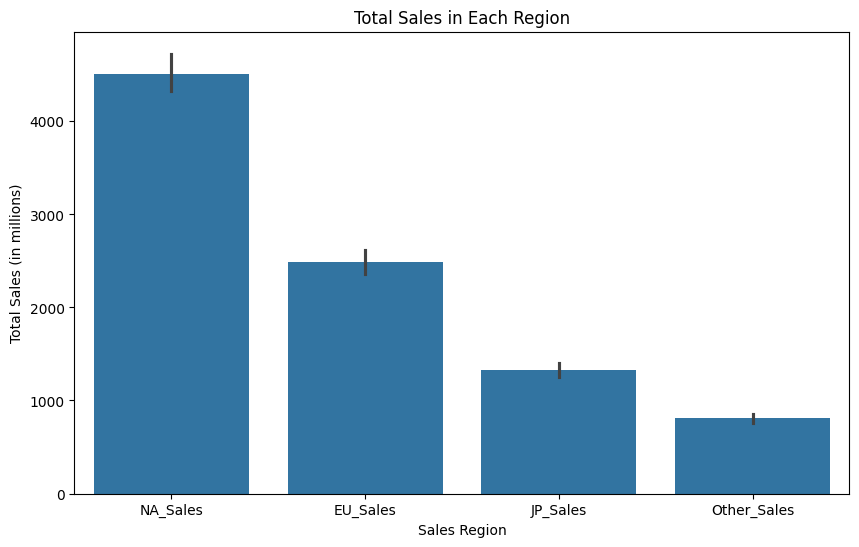

In [11]:
#creating a new dataframe df_melted to create a df with regions and sales values
df_melted = pd.melt(df, value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                    var_name='Region', value_name='Sales')

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df_melted, estimator=sum)

# Set labels and title
plt.xlabel('Sales Region')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales in Each Region')

# Show the plot
plt.show()

In [12]:
#to know actual sales values of each region
df_melted.groupby('Region')['Sales'].sum()
#North Americans spend relatively higher money on video games compared to other regions
#Japan is only country to be listed on the map, as the sales figure would be misleading if it were to be included in other sales category

Region
EU_Sales       2485.88
JP_Sales       1323.27
NA_Sales       4509.45
Other_Sales     810.19
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Number of Games By Genre')

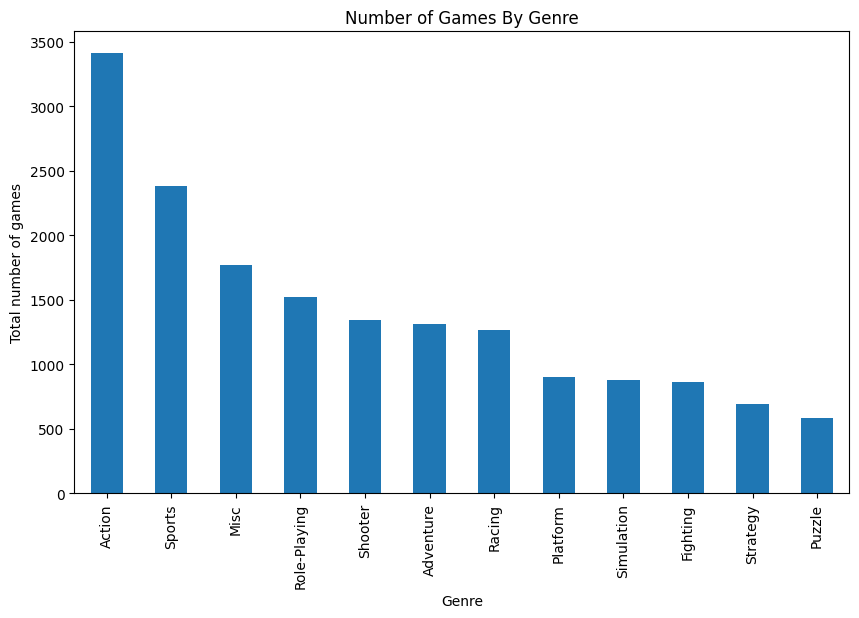

In [13]:
plt.figure(figsize=(10,6))
df['Genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Total number of games')
plt.title('Number of Games By Genre')

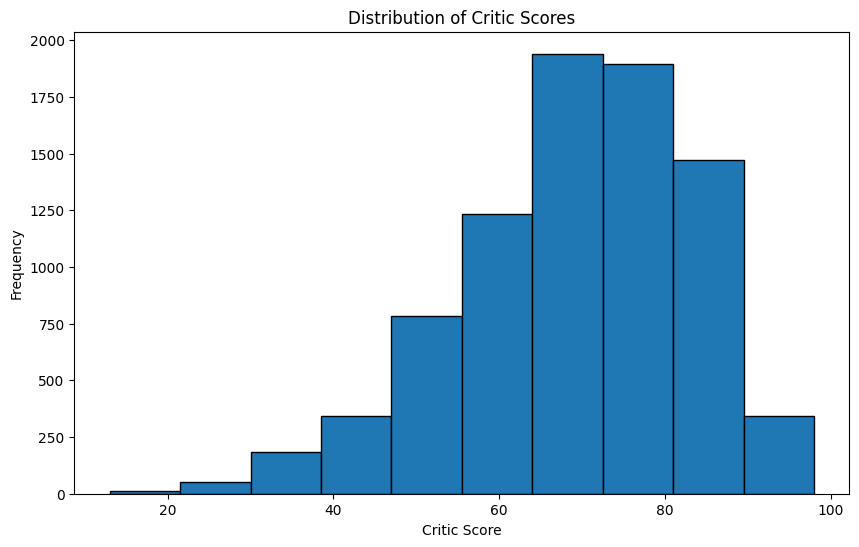

In [14]:
plt.figure(figsize=(10,6))
plt.hist(df['Critic_Score'],bins=10,edgecolor='black')
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

In [15]:
#the histogram is left skewed most of the games have a critic score of more than 60

Text(0, 0.5, 'NA Sales (in millions)')

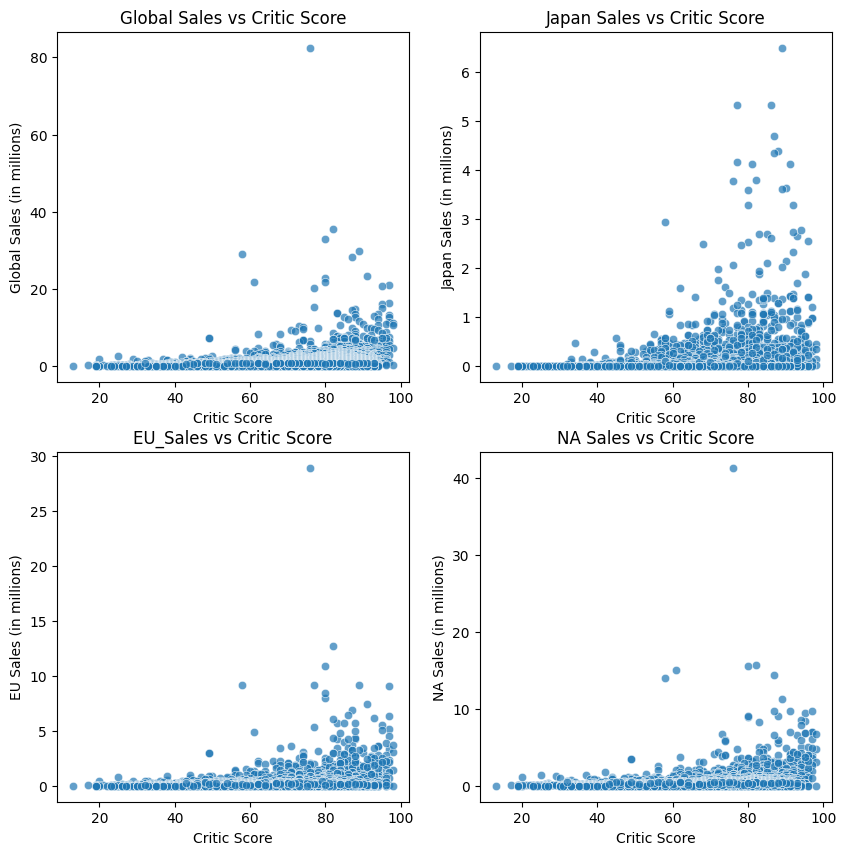

In [16]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(10,10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df,alpha=0.7)
plt.title('Global Sales vs Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')

plt.subplot(2,2,2)
sns.scatterplot(x='Critic_Score',y='JP_Sales',data=df,alpha=0.7)
plt.title('Japan Sales vs Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Japan Sales (in millions)')

plt.subplot(2,2,3)
sns.scatterplot(x='Critic_Score',y='EU_Sales',data=df,alpha=0.7)
plt.title('EU_Sales vs Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('EU Sales (in millions)')

plt.subplot(2,2,4)
sns.scatterplot(x='Critic_Score',y='NA_Sales',data=df,alpha=0.7)
plt.title('NA Sales vs Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('NA Sales (in millions)')

In [17]:
#not all high critic score games have high sales but in Japan games with high critic score have high sales

In [18]:
df[['User_Score','Critic_Score']]

,User_Score,Critic_Score
0,8,76.0
1,NaN,NaN
2,8.3,82.0
3,8,80.0
4,NaN,NaN
...,...,...
16923,3.6,43.0
16924,7.8,51.0
16925,7.4,64.0
16926,8.8,88.0


In [19]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In [20]:
#converted the data type of User_Score from object to float to make viz

In [21]:
df['User_Score'].dtypes

dtype('float64')

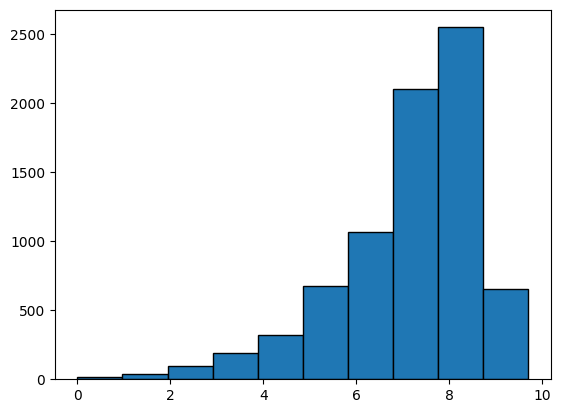

In [22]:
plt.hist(df['User_Score'],bins=10,edgecolor='black')
plt.show()

In [23]:
#User_Score column is right skewed indicating more games have higher score(better games)

Text(0.5, 1.0, 'User Score vs NA Sales')

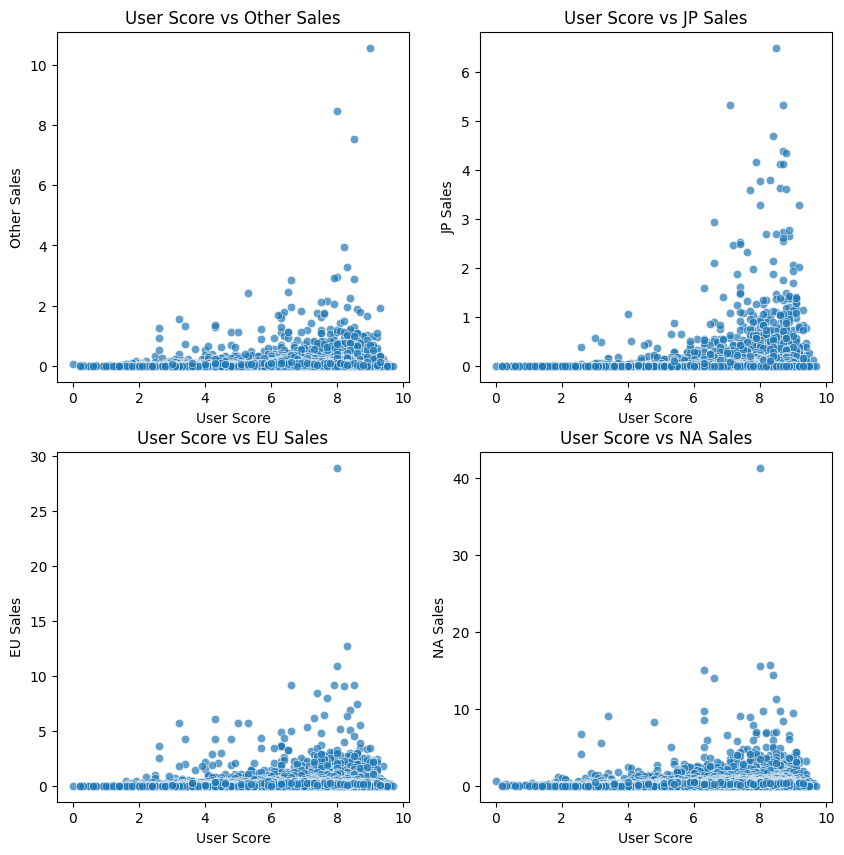

In [24]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(x='User_Score',y='Other_Sales',data=df,alpha=0.7)
plt.xlabel('User Score')
plt.ylabel('Other Sales')
plt.title('User Score vs Other Sales')
plt.subplot(2,2,2)
sns.scatterplot(x='User_Score',y='JP_Sales',data=df,alpha=0.7)
plt.xlabel('User Score')
plt.ylabel('JP Sales')
plt.title('User Score vs JP Sales')
plt.subplot(2,2,3)
sns.scatterplot(x='User_Score',y='EU_Sales',data=df,alpha=0.7)
plt.xlabel('User Score')
plt.ylabel('EU Sales')
plt.title('User Score vs EU Sales')
plt.subplot(2,2,4)
sns.scatterplot(x='User_Score',y='NA_Sales',data=df,alpha=0.7)
plt.xlabel('User Score')
plt.ylabel('NA Sales')
plt.title('User Score vs NA Sales')


In [25]:
#not all high user score games have high sales but in Japan games with high critic score have high sales

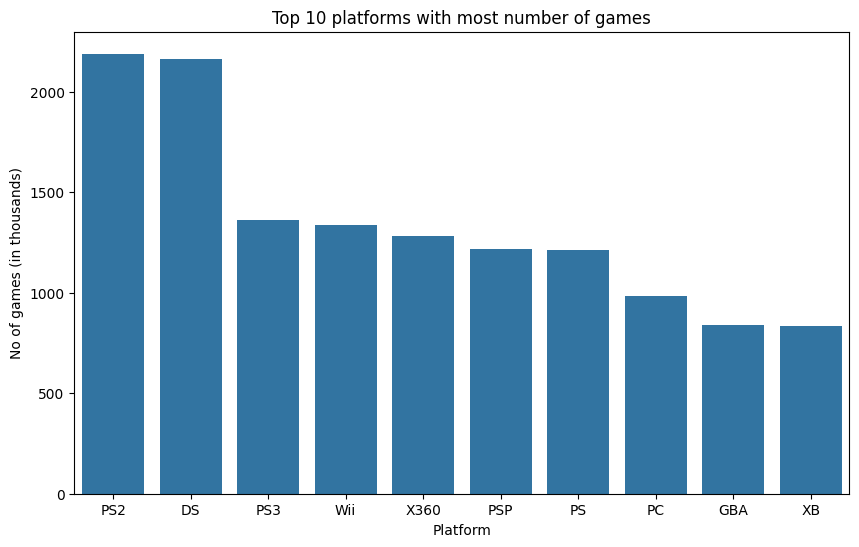

In [35]:
top_ten_platforms=df['Platform'].value_counts().nlargest(10).index
plt.figure(figsize=(10,6))
sns.countplot(x='Platform',data=df,order=top_ten_platforms)
plt.xlabel('Platform')
plt.ylabel('No of games (in thousands)')
plt.title('Top 10 platforms with most number of games')
plt.show()

Text(0.5, 1.0, 'No of games released in a year by top 10 platforms')

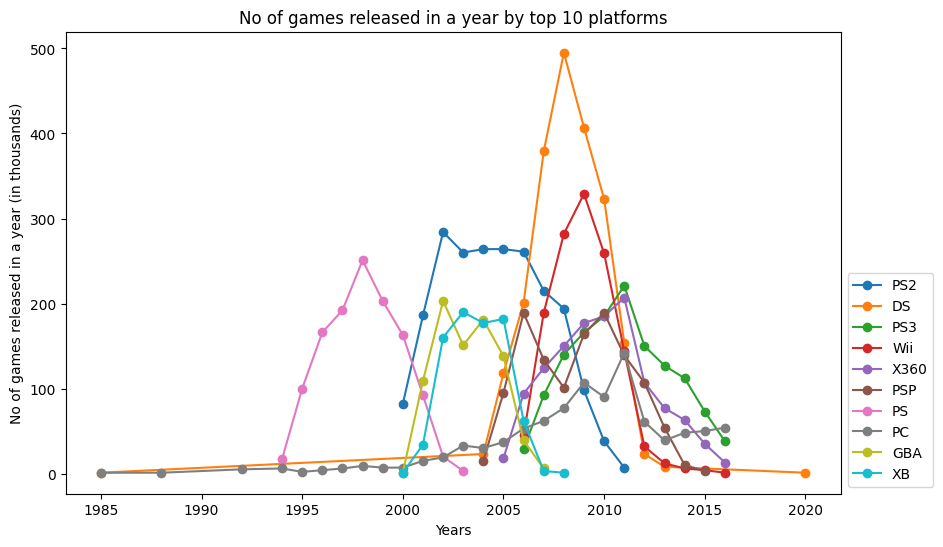

In [60]:
plt.figure(figsize=(10,6))
for platform in top_ten_platforms:
    platform_data=df[df['Platform']==platform]
    yearly_data=platform_data.groupby('Year_of_Release').size()
    plt.plot(yearly_data.index,yearly_data.values,marker='o',label=platform)
plt.legend(loc='lower left', bbox_to_anchor=(1,0))
plt.xlabel('Years')
plt.ylabel('No of games released in a year (in thousands)')
plt.title('No of games released in a year by top 10 platforms')

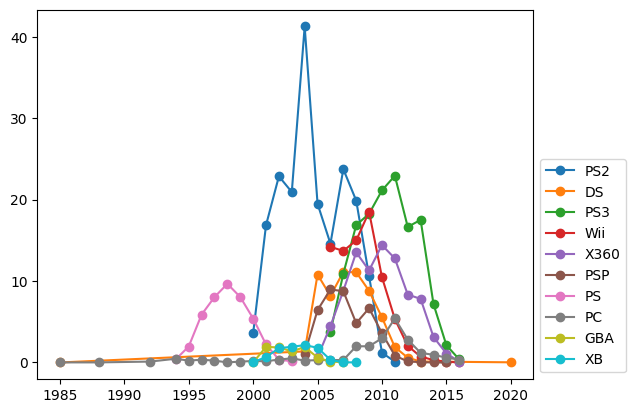

In [64]:
for platform in top_ten_platforms:
    platform_data=df[df['Platform']==platform]
    sales_data=platform_data.groupby('Year_of_Release')['Other_Sales'].sum()
    plt.plot(sales_data.index,sales_data.values,marker='o',label=platform)
plt.legend(loc='lower left',bbox_to_anchor=(1,0))

,Region,Sales
0,NA_Sales,41.36
1,NA_Sales,29.08
2,NA_Sales,15.68
3,NA_Sales,15.61
4,NA_Sales,11.27
...,...,...
67707,Other_Sales,0.11
67708,Other_Sales,0.08
67709,Other_Sales,0.03
67710,Other_Sales,0.02


<Figure size 1000x600 with 0 Axes>

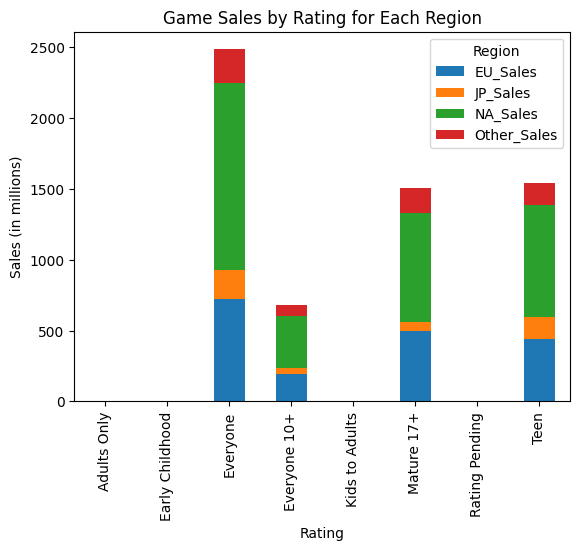

In [75]:
sales_by_rating = df.pivot_table(index='Rating',values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],aggfunc='sum')
plt.figure(figsize=(10,6))
sales_by_rating.plot(kind='bar', stacked=True)
plt.title('Game Sales by Rating for Each Region')
plt.xlabel('Rating')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.show()

/tmp/ipykernel_4436/1244068035.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Sales', data=rating_region_fit, ci=None, palette='viridis', estimator=sum, ax=axes[i])
/tmp/ipykernel_4436/1244068035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Sales', data=rating_region_fit, ci=None, palette='viridis', estimator=sum, ax=axes[i])
/tmp/ipykernel_4436/1244068035.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Sales', data=rating_region_fit, ci=None, palette='viridis', estimator=sum, ax=axes[i])
/tmp/ipykernel_4436/1244068035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to

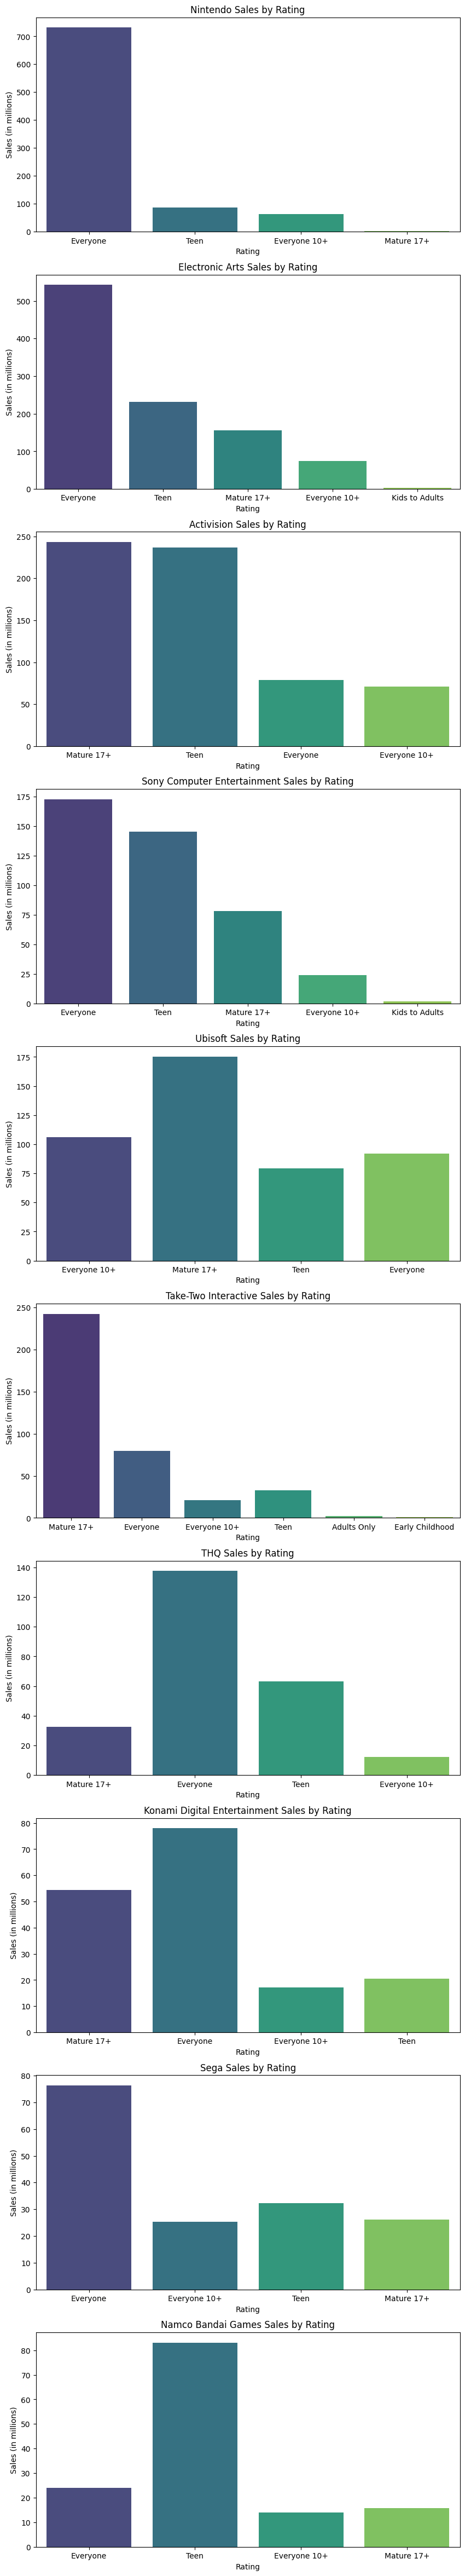

In [122]:
df['Total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
top_ten_publishers = df.groupby('Publisher')['Total_Sales'].sum().nlargest(10).index
fig,axes=plt.subplots(nrows=len(top_ten_publishers),ncols=1,figsize=(10,6*len(top_ten_publishers)))

for i, publisher in enumerate(top_ten_publishers):
    publisher_data=df[df['Publisher']==publisher]
    rating_region_fit = pd.melt(publisher_data, id_vars=['Rating'],
                                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                var_name='Region', value_name='Sales')
    sns.barplot(x='Rating', y='Sales', data=rating_region_fit, ci=None, palette='viridis', estimator=sum, ax=axes[i])
    axes[i].set_title(f'{publisher} Sales by Rating')
    axes[i].set_ylabel('Sales (in millions)')
plt.show()

In [121]:
top_ten_publishers

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games'],
      dtype='object', name='Publisher')

In [133]:
rating_region = pd.melt(df, id_vars=['Rating'],
                                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                var_name='Region', value_name='Sales')

In [134]:
rating_region

,Rating,Region,Sales
0,Everyone,NA_Sales,41.36
1,NaN,NA_Sales,29.08
2,Everyone,NA_Sales,15.68
3,Everyone,NA_Sales,15.61
4,NaN,NA_Sales,11.27
...,...,...,...
67707,Mature 17+,Other_Sales,0.11
67708,Mature 17+,Other_Sales,0.08
67709,Mature 17+,Other_Sales,0.03
67710,Teen,Other_Sales,0.02


/tmp/ipykernel_4436/1420538226.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', hue='Rating', data=rating_region, ci=None, palette='viridis', estimator=sum)


<Axes: xlabel='Region', ylabel='Sales'>

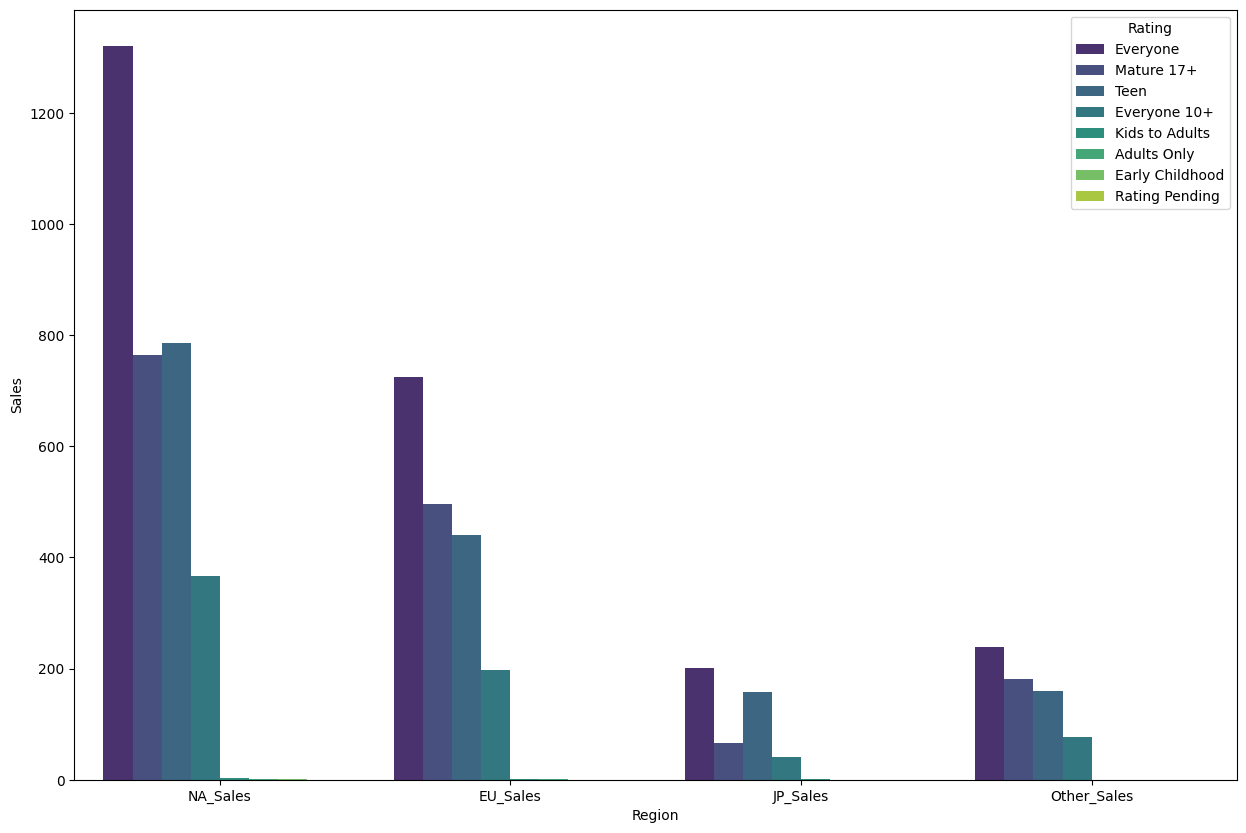

In [135]:
plt.figure(figsize=(15,10))
sns.barplot(x='Region', y='Sales', hue='Rating', data=rating_region, ci=None, palette='viridis', estimator=sum)

/tmp/ipykernel_4436/2148392837.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region',y='Sales',hue='Genre',data=Genre_region,ci=None,palette='viridis', estimator=sum)


<Axes: xlabel='Region', ylabel='Sales'>

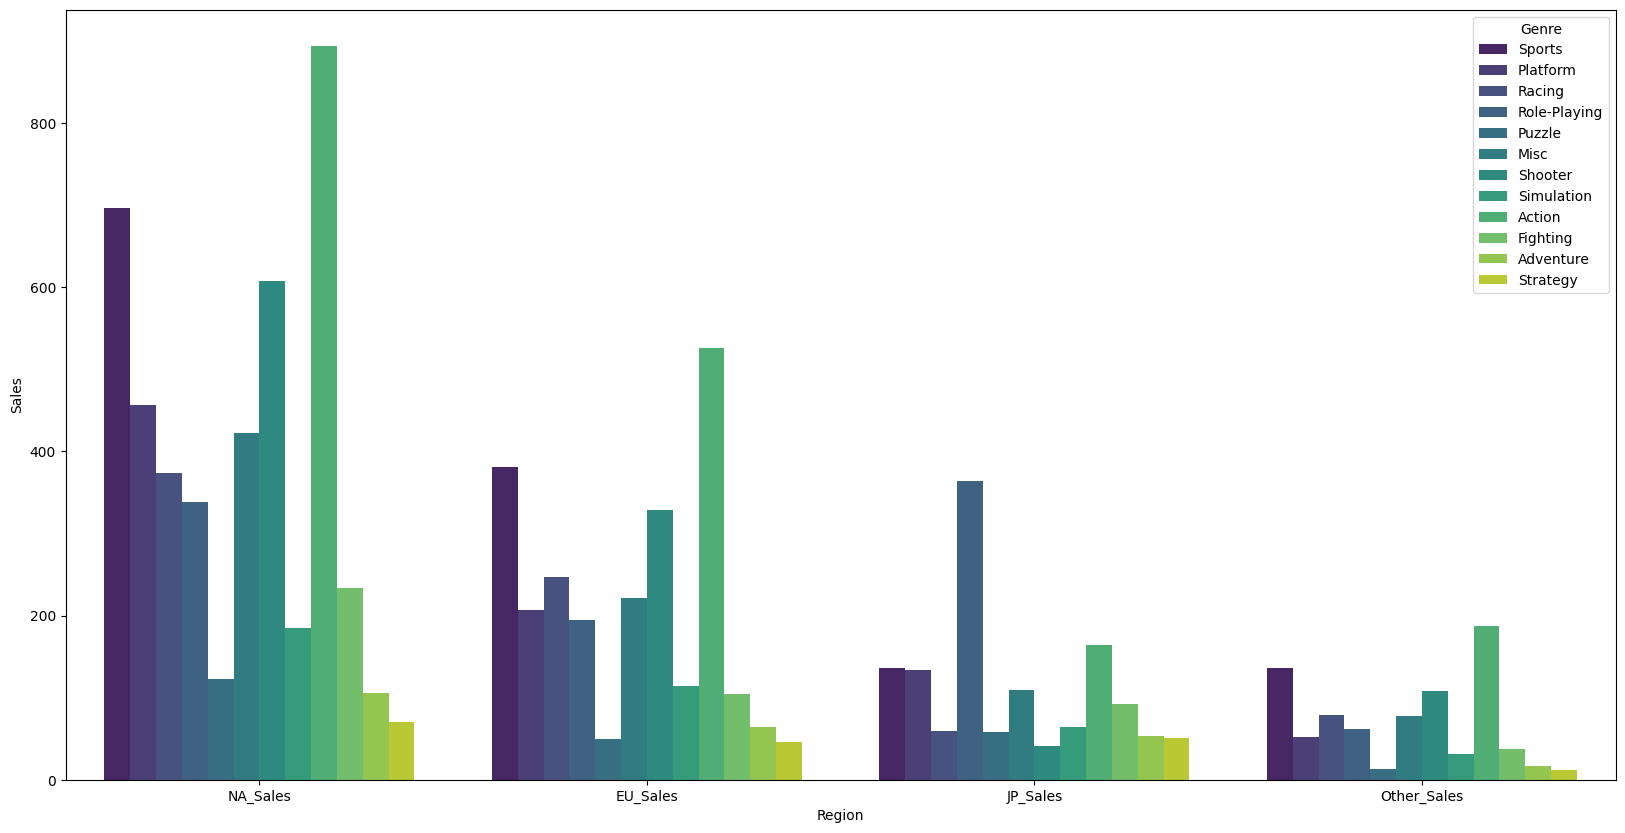

In [139]:
plt.figure(figsize=(20,10))
Genre_region = pd.melt(df, id_vars=['Genre'],
                                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                var_name='Region', value_name='Sales')
sns.barplot(x='Region',y='Sales',hue='Genre',data=Genre_region,ci=None,palette='viridis', estimator=sum)

In [140]:
#gamers in NA & EU have similar taste in Genre